In [ ]:
from PIL import Image
im = Image.open("/content/7_jpg.rf.d893ef993a97b23476408c07c1eb6ce8.jpg")
im.show()

In [ ]:
pip install opencv-python scikit-image numpy matplotlib

In [ ]:
import cv2
import numpy as np
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

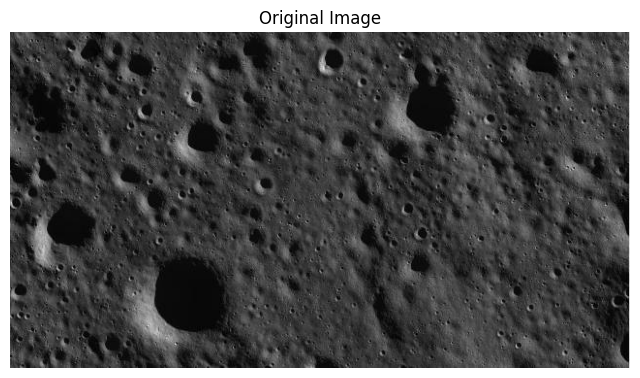

In [ ]:
# Load the image
image = cv2.imread('/content/7_jpg.rf.d893ef993a97b23476408c07c1eb6ce8.jpg')
# Convert from BGR to RGB (OpenCV loads in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


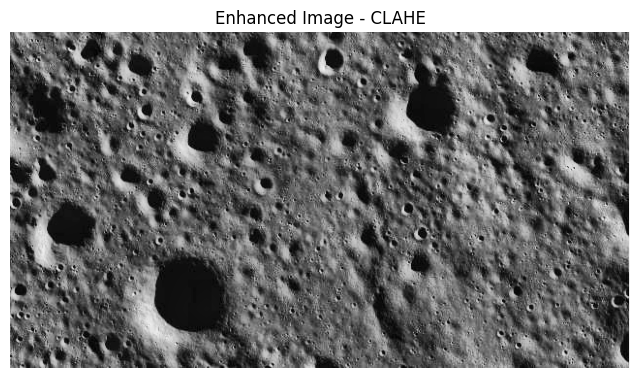

In [ ]:
# Convert to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
l_channel, a, b = cv2.split(lab_image)

# Apply CLAHE to the L-channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel back with A and B channels
enhanced_lab_image = cv2.merge((cl, a, b))
enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2RGB)

# Display the enhanced image
plt.figure(figsize=(8, 8))
plt.imshow(enhanced_image)
plt.title("Enhanced Image - CLAHE")
plt.axis('off')
plt.show()


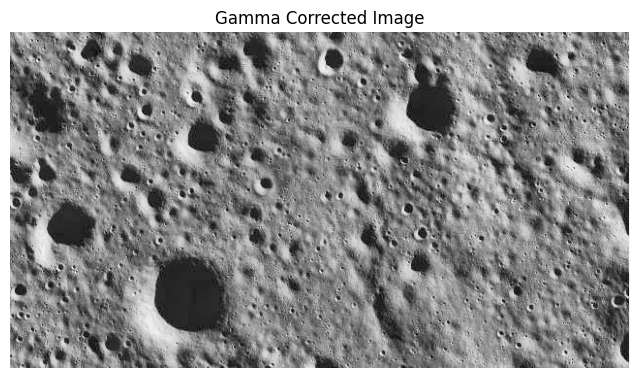

In [ ]:
def adjust_gamma(image, gamma=1.5):
    # Build a lookup table mapping pixel values [0, 255] to their adjusted gamma values
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply Gamma Correction
gamma_corrected = adjust_gamma(enhanced_image, gamma=1.5)

# Display the gamma-corrected image
plt.figure(figsize=(8, 8))
plt.imshow(gamma_corrected)
plt.title("Gamma Corrected Image")
plt.axis('off')
plt.show()


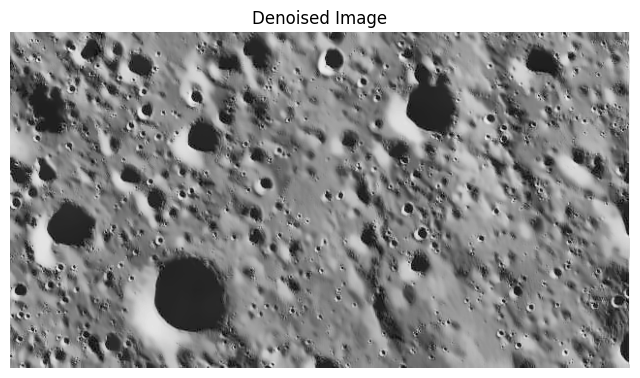

In [ ]:
# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(gamma_corrected, None, 10, 10, 7, 21)

# Display the denoised image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_image)
plt.title("Denoised Image")
plt.axis('off')
plt.show()


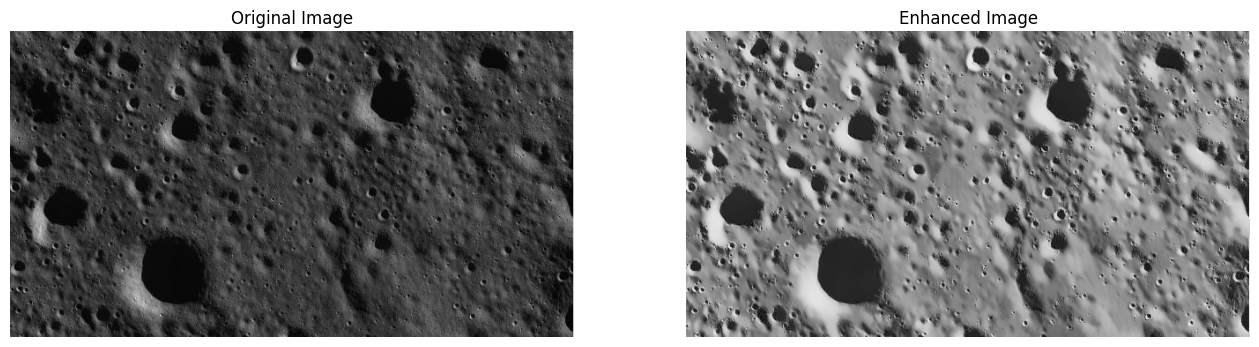

In [ ]:
# Display the original and enhanced images side by side
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced Image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("Enhanced Image")
plt.axis('off')

# Show the comparison
plt.show()


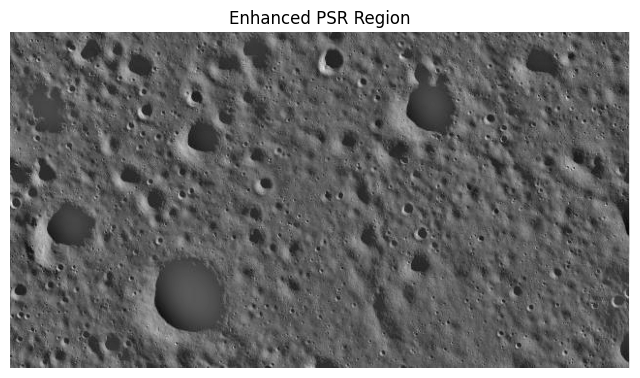

In [ ]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

# Apply Single-Scale Retinex
def single_scale_retinex(img, sigma):
    retinex = np.log10(img + 1) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma) + 1)
    return retinex

# Enhance only the Luminance (Brightness) Channel of the image using Retinex
def enhance_psr(image):
    # Convert to grayscale since Retinex works best on single-channel images
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Normalize the image to range 0 to 1
    norm_image = gray_image / 255.0
    enhanced = single_scale_retinex(norm_image, sigma=15)

    # Scale the output back to 0-255 and convert to uint8
    enhanced = cv2.normalize(enhanced, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return enhanced

# Applying the enhancement
enhanced_psr_image = enhance_psr(image)

# Display the enhanced PSR image
plt.figure(figsize=(8, 8))
plt.imshow(enhanced_psr_image, cmap='gray')
plt.title("Enhanced PSR Region")
plt.axis('off')
plt.show()


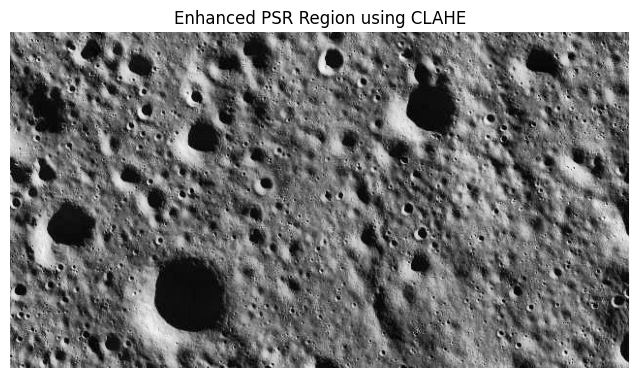

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original image in grayscale (single channel)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_psr_image = clahe.apply(gray_image)

# Display the enhanced PSR image
plt.figure(figsize=(8, 8))
plt.imshow(enhanced_psr_image, cmap='gray')
plt.title("Enhanced PSR Region using CLAHE")
plt.axis('off')
plt.show()


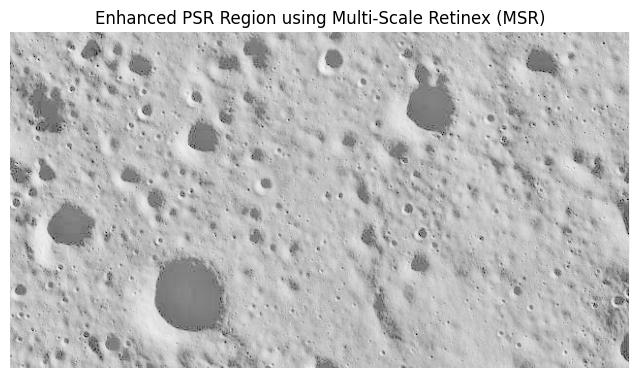

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def single_scale_retinex(image, sigma):
    """Applies Single Scale Retinex on the image."""
    blur = cv2.GaussianBlur(image, (0, 0), sigma)
    retinex = np.log10(image + 1.0) - np.log10(blur + 1.0)
    return retinex

def multi_scale_retinex(image, scales=[15, 80, 250]):
    """Applies Multi-Scale Retinex with given scales."""
    retinex = np.zeros_like(image, dtype=np.float32)
    for scale in scales:
        retinex += single_scale_retinex(image, scale)
    retinex /= len(scales)
    return retinex

# Load the original grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Normalize image to 0-255 range for MSR
gray_image_norm = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.float32)

# Apply Multi-Scale Retinex
msr_enhanced = multi_scale_retinex(gray_image_norm)

# Normalize MSR output back to 0-255 and convert to uint8
msr_enhanced = cv2.normalize(msr_enhanced, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display MSR enhanced image
plt.figure(figsize=(8, 8))
plt.imshow(msr_enhanced, cmap='gray')
plt.title("Enhanced PSR Region using Multi-Scale Retinex (MSR)")
plt.axis('off')
plt.show()


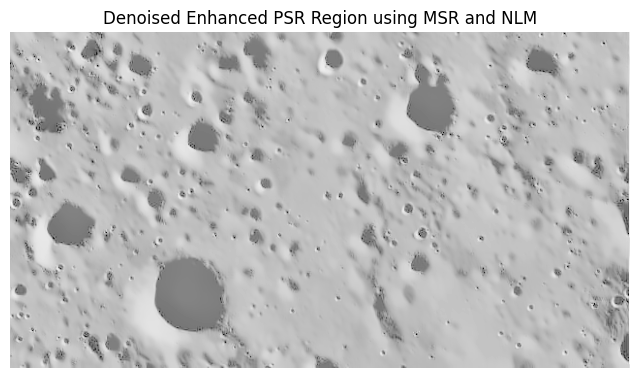

In [ ]:
# Apply Non-Local Means Denoising
denoised_msr = cv2.fastNlMeansDenoising(msr_enhanced, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Display the denoised MSR enhanced image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_msr, cmap='gray')
plt.title("Denoised Enhanced PSR Region using MSR and NLM")
plt.axis('off')
plt.show()


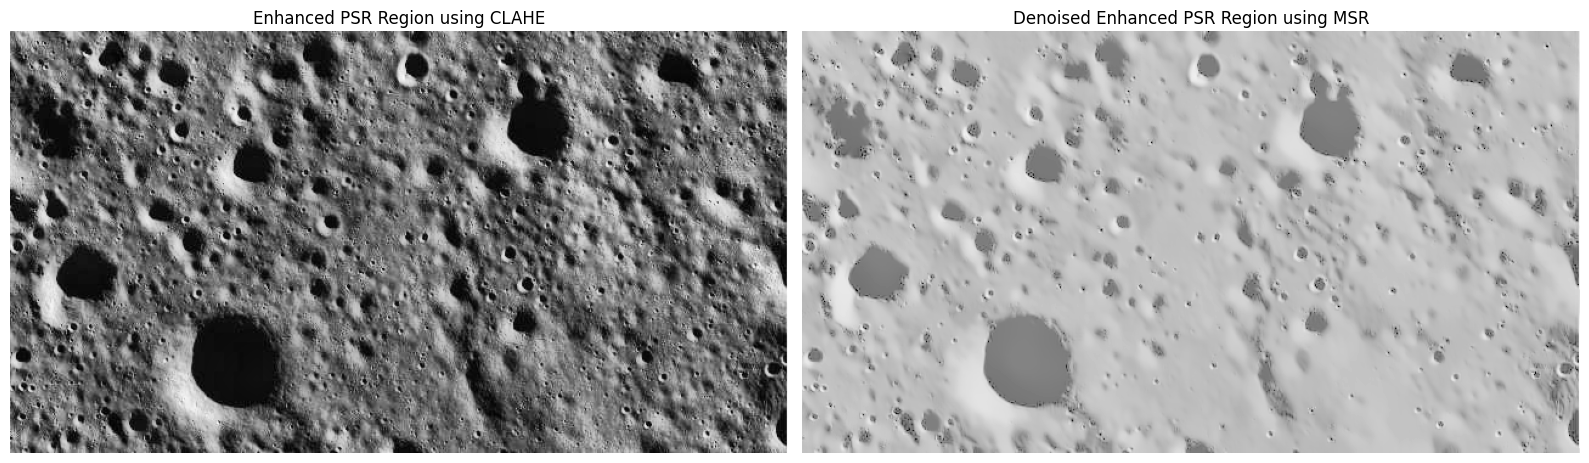

In [ ]:
# Display the CLAHE and MSR enhanced images side by side
plt.figure(figsize=(16, 8))

# CLAHE Enhanced Image
plt.subplot(1, 2, 1)
plt.imshow(enhanced_psr_image, cmap='gray')
plt.title('Enhanced PSR Region using CLAHE')
plt.axis('off')

# Denoised MSR Enhanced Image
plt.subplot(1, 2, 2)
plt.imshow(denoised_msr, cmap='gray')
plt.title('Denoised Enhanced PSR Region using MSR')
plt.axis('off')

plt.tight_layout()
plt.show()


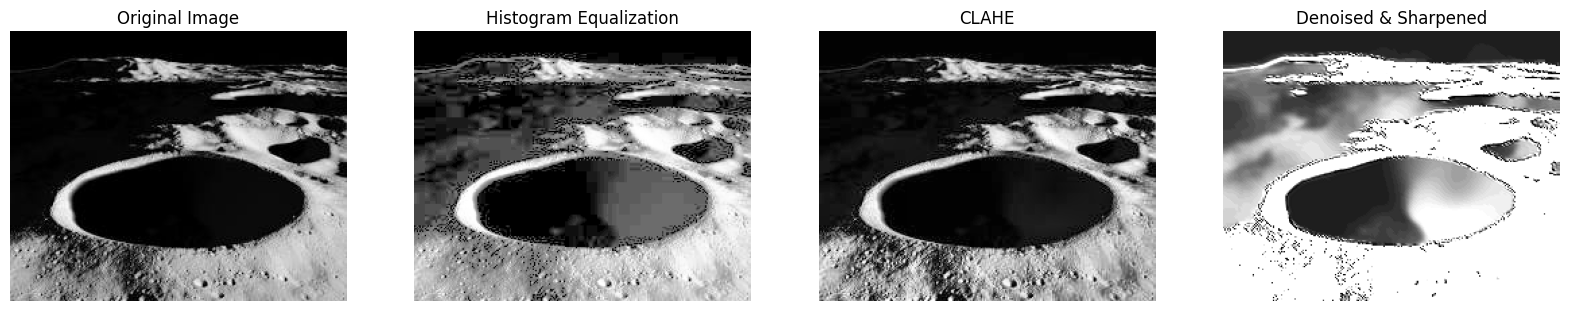

True

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('before enhancement.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Apply Histogram Equalization
hist_eq = cv2.equalizeHist(image)

# 2. Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# 3. Apply Denoising using Non-Local Means (NLM)
denoised = cv2.fastNlMeansDenoising(clahe_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

# 4. Sharpening the image
# Define a sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 9]])

sharpened = cv2.filter2D(denoised, -1, kernel)

# Display the results
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(hist_eq, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharpened, cmap='gray')
plt.title('Denoised & Sharpened')
plt.axis('off')

plt.show()

# Save the final enhanced image
cv2.imwrite('after enhancement.jpg', sharpened)


In [ ]:
pip install tensorflow opencv-python matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


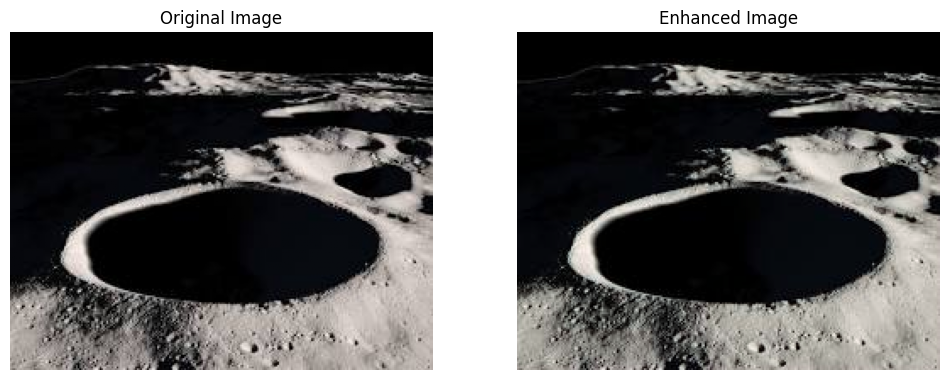

True

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define DCE-Net model
def dce_net(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Layer 1
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.ReLU()(x)

    # Layer 2
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Layer 3
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Layer 4
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Layer 5
    x = layers.Conv2D(24, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Layer 6
    x = layers.Conv2D(24, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Layer 7
    x = layers.Conv2D(24, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Output Layer
    outputs = layers.Conv2D(3, (3, 3), padding='same', activation='tanh')(x)

    model = models.Model(inputs, outputs)
    return model

# Zero-DCE Loss Functions
def spatial_consistency_loss(enhanced_image, input_image):
    # Calculate gradients
    grad_enh = tf.image.sobel_edges(enhanced_image)
    grad_inp = tf.image.sobel_edges(input_image)

    # L2 Loss
    loss = tf.reduce_mean(tf.square(grad_enh - grad_inp))
    return loss

def exposure_control_loss(enhanced_image, target_exposure=0.6):
    mean_val = tf.reduce_mean(enhanced_image)
    loss = tf.reduce_mean(tf.square(mean_val - target_exposure))
    return loss

def color_constancy_loss(enhanced_image):
    mean_rgb = tf.reduce_mean(enhanced_image, axis=(1, 2), keepdims=True)
    loss = tf.reduce_mean(tf.square(mean_rgb[:, :, :, 0] - mean_rgb[:, :, :, 1]) +
                          tf.square(mean_rgb[:, :, :, 1] - mean_rgb[:, :, :, 2]) +
                          tf.square(mean_rgb[:, :, :, 2] - mean_rgb[:, :, :, 0]))
    return loss

def illumination_smoothness_loss(curve, enhanced_image):
    loss = tf.reduce_mean(tf.abs(curve[:, :-1, :, :] - curve[:, 1:, :, :]) +
                          tf.abs(curve[:, :, :-1, :] - curve[:, :, 1:, :]))
    return loss

# Load Image and Normalize
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize
    return img

# Enhance Image
def enhance_image(image, model):
    curve = model.predict(image[np.newaxis, ...])
    enhanced_image = image + curve[0] * image * (1 - image)
    enhanced_image = np.clip(enhanced_image, 0, 1)
    return enhanced_image

# Load and process images
input_image = load_and_preprocess_image('before enhancement.jpg')

# Instantiate and compile model
model = dce_net(input_shape=input_image.shape)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=[spatial_consistency_loss, exposure_control_loss, color_constancy_loss, illumination_smoothness_loss])

# Training is skipped here for simplicity. You should ideally train on a dataset.

# Enhance the image using the trained model
enhanced_image = enhance_image(input_image, model)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

# Save enhanced image
enhanced_image = (enhanced_image * 255).astype(np.uint8)
cv2.imwrite('after enhancement.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))


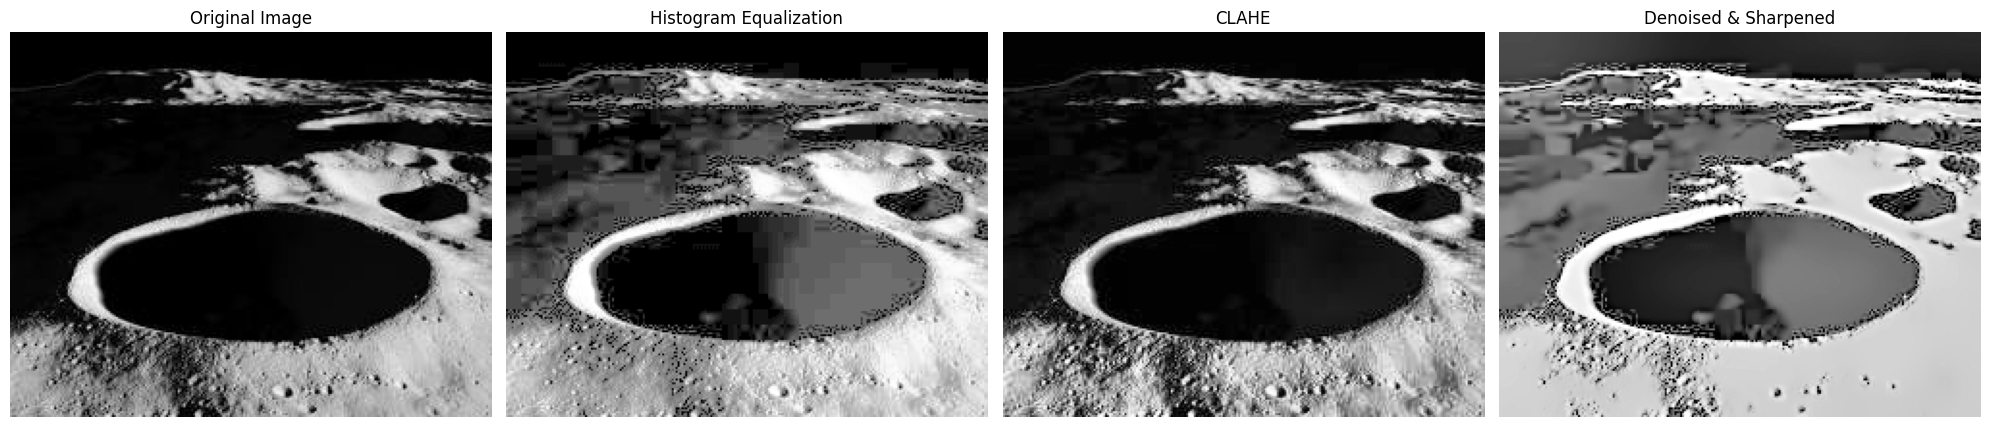

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Convert the Image to Grayscale
image = cv2.imread('/content/before enhancement.jpg')  # Update with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Normalize the Grayscale Image
normalized_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

# Step 3: Histogram Equalization
hist_eq_image = cv2.equalizeHist(normalized_image)

# Step 4: CLAHE Enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(normalized_image)

# Step 5: Multi-Scale Retinex Enhancement
def single_scale_retinex(image, sigma):
    blur = cv2.GaussianBlur(image, (0, 0), sigma)
    retinex = np.log10(image + 1.0) - np.log10(blur + 1.0)
    return retinex

def multi_scale_retinex(image, scales=[15, 80, 250]):
    retinex = np.zeros_like(image, dtype=np.float32)
    for scale in scales:
        retinex += single_scale_retinex(image, scale)
    retinex /= len(scales)
    return retinex

# Apply MSR
msr_image = multi_scale_retinex(normalized_image)
msr_image = cv2.normalize(msr_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Step 6: Denoising using Non-Local Means Filtering
denoised_image = cv2.fastNlMeansDenoising(msr_image, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 7: Sharpening with Unsharp Mask
# Unsharp mask: image + amount * (image - blurred_image)
blurred = cv2.GaussianBlur(denoised_image, (9, 9), 10.0)
sharpened_image = cv2.addWeighted(denoised_image, 1.5, blurred, -0.5, 0)

# Step 8: Display the Results
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Histogram Equalization
plt.subplot(1, 4, 2)
plt.imshow(hist_eq_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

# CLAHE
plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

# Denoised & Sharpened Image
plt.subplot(1, 4, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Denoised & Sharpened')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load the enhanced lunar image and a reference real lunar image
enhanced_image = cv2.imread('/content/after enhancement.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your enhanced image path
real_image = cv2.imread('/content/before enhancement.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with the real lunar image path

# Step 1: Histogram Matching - Adjust enhanced image to match the real image histogram
matched_image = exposure.match_histograms(enhanced_image, real_image, multichannel=False)

# Step 2: Further Texture Enhancement using Sharpening Filters
# Sharpen the matched image to bring out structural details similar to the real image
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_matched_image = cv2.filter2D(matched_image, -1, sharpen_kernel)

# Step 3: Denoise and Smoothen Image to Retain Realistic Features
denoised_matched_image = cv2.fastNlMeansDenoising(sharpened_matched_image, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 4: Final Enhancement with CLAHE for Local Contrast Boosting
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
final_enhanced_image = clahe.apply(denoised_matched_image)

# Step 5: Display the comparison of images
plt.figure(figsize=(20, 10))

# Original Enhanced Image
plt.subplot(1, 4, 1)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

# Real Lunar Image
plt.subplot(1, 4, 2)
plt.imshow(real_image, cmap='gray')
plt.title('Real Lunar Image')
plt.axis('off')

# Matched Image
plt.subplot(1, 4, 3)
plt.imshow(matched_image, cmap='gray')
plt.title('Histogram Matched Image')
plt.axis('off')

# Final Enhanced Image
plt.subplot(1, 4, 4)
plt.imshow(final_enhanced_image, cmap='gray')
plt.title('Final Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()


TypeError: match_histograms() got an unexpected keyword argument 'multichannel'